In [13]:
import numpy as np

# Image

In [104]:
pi = np.pi
def cosine_exp(x,y,fx,fy,a):
    return np.cos(2*pi*fx*x)*np.cos(2*pi*fy*y)*np.exp(-(x**2+y**2)/(2*a**2))

In [134]:
IMAGE_SIZE_X = 10
IMAGE_SIZE_Y = 10
xCenter = IMAGE_SIZE_X/2
yCenter = IMAGE_SIZE_Y/2
fx = 5
fy = 5
a = np.sqrt(100)

In [135]:
myfunction = cosine_exp

G_SIZE_REAL =  500
x = np.linspace(0,IMAGE_SIZE_X,G_SIZE_REAL) - xCenter
y = np.linspace(0,IMAGE_SIZE_Y,G_SIZE_REAL) - yCenter
G = np.zeros([G_SIZE_REAL, G_SIZE_REAL])

for i in range(G_SIZE_REAL):
    for j in range(G_SIZE_REAL):
        G[i,j] = myfunction(x[i],y[j],fx,fy,a)
        
G_fft = np.fft.fft2(G)
G_fft = np.fft.fftshift(G_fft)

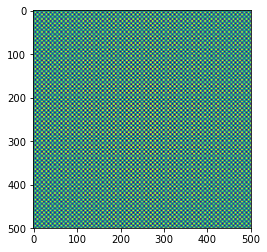

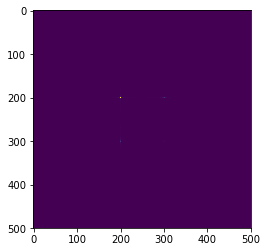

In [136]:
import matplotlib.pyplot as plt

plt.imshow(G)
plt.show()
plt.imshow(np.abs(G_fft))
plt.show()

# Model

In [5]:
from scipy.special import erf

In [6]:
# basis function
def phi(u, v, l, Cx, Cy):
    return np.exp(-2*np.pi**2*(u*u+v*v)*l**2)*np.exp(2*np.pi*1j*(Cx*u+Cy*v))

In [7]:
G_SIZE_MODEL =  100

factor = (400/G_SIZE_MODEL)
#factor = 1

G_fft_model = np.zeros((G_SIZE_MODEL,G_SIZE_MODEL),dtype=np.complex128)

u = np.linspace(0,IMAGE_SIZE_X,G_SIZE_MODEL) - xCenter
u = u/factor
v = np.linspace(0,IMAGE_SIZE_Y,G_SIZE_MODEL) - yCenter
v = v/factor

for i in range(G_SIZE_MODEL):
    for j in range(G_SIZE_MODEL):
        G_fft_model[i,j] = I*l*np.sqrt(np.pi/2)*phi(u[i],v[j],l,Cx,Cy)

** Definir una función, graficar ambas y calcular la anti transformada numérica. Para entender como funciona la FFT de numpy. **

*Probar con cosine y exponential.*

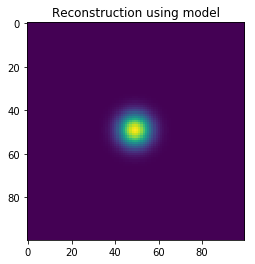

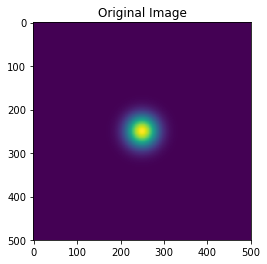

In [8]:
from scipy import ndimage

G_model = np.fft.ifft2(G_fft_model)
G_model = np.fft.fftshift(G_model)
G_model.real = ndimage.rotate(G_model.real, 90*2)
G_model.imag = ndimage.rotate(G_model.imag, 90*2)
plt.imshow(np.abs(G_model))
plt.title('Reconstruction using model')
plt.show()

plt.imshow(G)
plt.title('Original Image')
plt.show()

In [9]:
xIndex = np.ceil( np.argmax(np.max(np.abs(G_model), axis = 0)) ).astype(int)
yIndex = np.ceil( np.argmax(np.max(np.abs(G_model), axis = 1)) ).astype(int)
xIndexOr = np.ceil( np.argmax(np.max(G, axis = 0)) ).astype(int)
yIndexOr = np.ceil( np.argmax(np.max(G, axis = 1)) ).astype(int)

print('-------------------------------------------------------------------')
print('Reconstruction (x index, y index, Max Value): (%i, %i, %f)' % (xIndex, yIndex, np.max(np.abs(G_model)) ) )
print('      Original (x index, y index, Max Value): (%i, %i, %f)' % (xIndexOr, yIndexOr, np.max(G) ) )
print('-------------------------------------------------------------------')
print('-------------------------------------------------------------------')
print('Reconstruction Centers: (%f, %f)' % (u[xIndex]*factor, u[yIndex]*factor))
print('      Original Centers: (%f, %f)' % (x[xIndexOr], y[yIndexOr]) )
print('-------------------------------------------------------------------')

-------------------------------------------------------------------
Reconstruction (x index, y index, Max Value): (49, 49, 1.407612)
      Original (x index, y index, Max Value): (249, 249, 71.780777)
-------------------------------------------------------------------
-------------------------------------------------------------------
Reconstruction Centers: (-0.101010, -0.101010)
      Original Centers: (-0.020040, -0.020040)
-------------------------------------------------------------------


In [10]:
coef = np.max(G)/np.max(np.abs(G_model))
dx = x[1]-x[0]
du = u[1]-u[0]
print(coef)
print(dx)
print(du)
print(dx/du)
print(dx**2*coef)

50.994718693
0.0400801603206
0.0505050505051
0.793587174349
0.0819188978245
